In this post, we will see how to use Keras to build Convolutional Neural Networks to predict what’s inside a small image

We will go through the full Deep Learning pipeline, from:
Exploring and Processing the Data
Building and Training our Convolutional Neural Network
Testing out with your own images

In this post, we will use the CIFAR-10 dataset.

The details of the dataset are as follows:
Images to be recognized: Tiny images of 32 * 32 pixels
Labels: 10 possible labels (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck)
Dataset size: 60000 images, split into 50000 for training and 10000 for testing

Here is an example of the images and their labels:

![alt text](https://miro.medium.com/max/700/1*6qJdPhPfO0ag_45PT4i5SQ.png)

In [ ]:
#First we need to do is get this dataset. It is in keras library

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [ ]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

These images have 32*32 pixels and 3 layers.

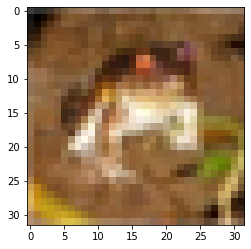

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
img = plt.imshow(x_train[0])

Here y lablels are numbers which represents names of images:
![alt text](https://miro.medium.com/max/314/1*E7N3oVdqc-QUwd9_T0i9SQ.png)

Here the image can belong to one of 10 different classes.
What we really want is the probability of each of the 10 different classes. For that, we need 10 output neurons in our neural network. Since we have 10 output neurons, our labels must match this as well.
To do this, we convert the label into a set of 10 numbers where each number represents if the image belongs to that class or not. So if an image belongs to the first class, the first number of this set will be a 1 and all other numbers in this set will be a 0. This is called a one-hot encoding, and the conversion table now looks like this:


![alt text](https://miro.medium.com/max/565/1*t-ttNgcua-JtTlLjdRScww.png)

In [ ]:
#Lets do it
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [ ]:
y_test_one_hot[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

It has 1 in 3rsd index. So it is CAT

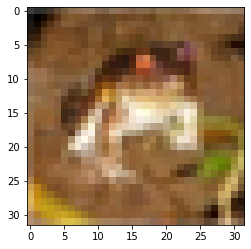

In [ ]:
plt.imshow(x_train[0])

Now that we’ve processed our labels (y), we might also want to process our image (x). A common step we do is to let the values to be between 0 and 1, which will aid in the training of our neural network. Since our pixel values already take the values between 0 and 255, we simply need to divide by 255.

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

Building and Training our Convolutional Neural Network

First Step: Setting up the Architecture

![alt text](https://miro.medium.com/max/1000/1*b4neYlVytzv5lfGmHAcqTQ.png)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import adam

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              #optimizer=adam(lr=0.001),
              optimizer='adam',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

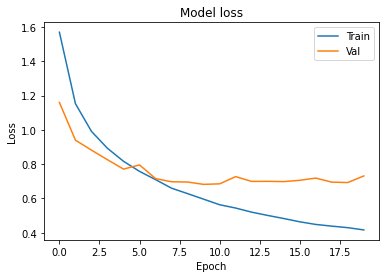

In [ ]:

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

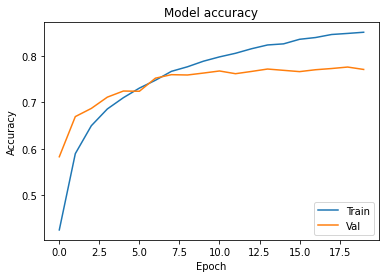

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

At this point, I encourage you to go back and try out different hyper-parameters such as changing the architecture or increasing the number of epochs to see if you can get a better val accuracy. And once you’re happy with your model, you can evaluate it on the test set:



In [ ]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 1s 104us/step


0.762499988079071

Testing out with your own images

In [ ]:
my_image = plt.imread("/content/drive/My Drive/projects/Simple_CNN/cat.jpg")

The first thing we have to do is to resize the image of our cat so that we can fit it into our model (input size of 32 * 32 * 3). 

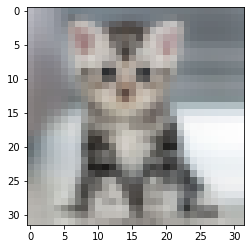

In [ ]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))
img = plt.imshow(my_image_resized)

In [ ]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

This might look confusing, but model.predict expects a 4-D array instead of a 3-D array (with the missing dimension being the number of training examples). This is consistent with the training set and test set that we had previously. Thus, the np.array(...) code is there to change our current array of my_image_resized into a 4-D array before applying the model.predict function.

In [ ]:
probabilities

array([[2.5675433e-07, 2.6700553e-10, 6.4755448e-05, 5.0227488e-03,
        1.4480836e-04, 5.9579965e-02, 1.0528453e-04, 9.3508071e-01,
        1.1531785e-07, 1.3181732e-06]], dtype=float32)

In [ ]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: horse -- Probability: 0.9350807
Second most likely class: dog -- Probability: 0.059579965
Third most likely class: cat -- Probability: 0.005022749
Fourth most likely class: deer -- Probability: 0.00014480836
Fifth most likely class: frog -- Probability: 0.00010528453


It gives bad results. It predicted cat as horse. Lets do hyper parameter tuning

***Hyperparameter Tuning***

Keras Tuner Hypermodels

In [ ]:
#!pip install keras-tuner
from kerastuner import HyperModel

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
import tensorflow as tf
from kerastuner import HyperModel
strategy = tf.distribute.MirroredStrategy()
class CNNHyperModel(HyperModel):
  
           
    def build(self, hp):
        model = keras.Sequential()
        model.add(
            keras.layers.Conv2D(
                filters=16,
                kernel_size=3,
                activation='relu',
                input_shape=(32,32,3)
            )
        )
        model.add(
            keras.layers.Conv2D(
                filters=16,
                activation='relu',
                kernel_size=3
            )
        )
        model.add(keras.layers.MaxPooling2D(pool_size=2))
        model.add(
            keras.layers.Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.5,
                default=0.25,
                step=0.05,
            ))
        )
        model.add(
            keras.layers.Conv2D(
                filters=32,
                kernel_size=3,
                activation='relu'
            )
        )
        model.add(
            keras.layers.Conv2D(
                filters=hp.Choice(
                    'num_filters',
                    values=[32, 64],
                    default=64,
                ),
                activation='relu',
                kernel_size=3
            )
        )
        model.add(keras.layers.MaxPooling2D(pool_size=2))
        model.add(
            keras.layers.Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.5,
                default=0.25,
                step=0.05,
            ))
        )
        model.add(keras.layers.Flatten())
        model.add(
            keras.layers.Dense(
                units=hp.Int(
                    'units',
                    min_value=32,
                    max_value=512,
                    step=32,
                    default=128
                ),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'
                )
            )
        )
        model.add(
            keras.layers.Dropout(
                rate=hp.Float(
                    'dropout_3',
                    min_value=0.0,
                    max_value=0.5,
                    default=0.25,
                    step=0.05
                )
            )
        )
        model.add(keras.layers.Dense(10, activation='softmax'))

        model.compile(
            optimizer=keras.optimizers.Adam(
                hp.Float(
                    'learning_rate',
                    min_value=1e-4,
                    max_value=1e-2,
                    sampling='LOG',
                    default=1e-3
                )
            ),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

hypermodel = CNNHyperModel()


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


Keras Tuner offers the main hyperparameter tuning methods: random search, Hyperband, and Bayesian optimization.

Random Search

In [ ]:
HYPERBAND_MAX_EPOCHS = 40
MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

In [ ]:
from kerastuner.tuners import RandomSearch

NUM_CLASSES = 10  # cifar10 number of classes
INPUT_SHAPE = (32, 32, 3)  # cifar10 images input shape

hypermodel = CNNHyperModel( )

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    seed=1,
    max_trials=20,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='random_search',
    project_name='Venu_CNN'
)

INFO:tensorflow:Reloading Oracle from existing project random_search/Venu_CNN/oracle.json


In [ ]:
tuner.search_space_summary()

In [ ]:
import IPython
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
tuner.search(x_train, y_train_one_hot, epochs= 20, validation_split=0.2,callbacks = [ClearTrainingOutput()])

INFO:tensorflow:Oracle triggered exit


In [ ]:
from sklearn.externals import joblib
joblib.dump(tuner, '/content/drive/My Drive/projects/Simple_CNN/tuner.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['/content/drive/My Drive/projects/Simple_CNN/tuner.pkl']

In [ ]:
tuner.results_summary()

In [ ]:
# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
best_model.save('/content/drive/My Drive/projects/Simple_CNN/best_model.h5')

In [ ]:
# Evaluate the best model.
loss, accuracy = best_model.evaluate(x_test, y_test_one_hot)


313/313 [==============================] - 1s 3ms/step - loss: 0.7416 - accuracy: 0.7451


Testing

In [ ]:
my_image = plt.imread("/content/drive/My Drive/projects/Simple_CNN/cat.jpg")

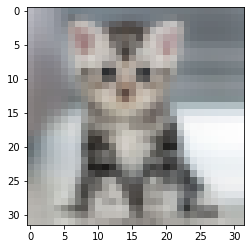

In [ ]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))
img = plt.imshow(my_image_resized)

In [ ]:
import numpy as np
probabilities = best_model.predict(np.array( [my_image_resized,] ))

In [ ]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: cat -- Probability: 0.42518145
Second most likely class: dog -- Probability: 0.34243292
Third most likely class: horse -- Probability: 0.18869323
Fourth most likely class: deer -- Probability: 0.03220632
Fifth most likely class: bird -- Probability: 0.0065507996


Exactly it predicted. It should be good model

In [ ]:
model2=best_model.fit(x_train, y_train_one_hot, epochs= 20, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7017 - accuracy: 0.7512 - val_loss: 0.7532 - val_accuracy: 0.7409
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6962 - accuracy: 0.7563 - val_loss: 0.7502 - val_accuracy: 0.7422
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6831 - accuracy: 0.7598 - val_loss: 0.7316 - val_accuracy: 0.7488
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6733 - accuracy: 0.7628 - val_loss: 0.7199 - val_accuracy: 0.7530
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6641 - accuracy: 0.7649 - val_loss: 0.7389 - val_accuracy: 0.7471
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6559 - accuracy: 0.7674 - val_loss: 0.7494 - val_accuracy: 0.7482
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6437 - accuracy: 0.7714 - val_loss: 0.7496 - val_accuracy:

In [ ]:
import tensorflow as tf
from tensorflow import keras

import IPython
!pip install -q -U keras-tuner
import kerastuner as kt

In [ ]:
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
  model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer 
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
  
  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])
  
  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 10,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'intro_to_kt')                       

In [ ]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [4]:
tuner.search(img_train, label_train, epochs = 10, validation_data = (img_test, label_test), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")